In [13]:
import joblib

import numpy as np
import pandas as pd

import sklearn

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("../Real_estate.csv")
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [4]:
new_df = df.copy()
new_df = new_df.iloc[:, 2:8]
new_df.head()

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,32.0,84.87882,10,24.98298,121.54024,37.9
1,19.5,306.59470,9,24.98034,121.53951,42.2
2,13.3,561.98450,5,24.98746,121.54391,47.3
3,13.3,561.98450,5,24.98746,121.54391,54.8
4,5.0,390.56840,5,24.97937,121.54245,43.1


In [5]:
x = new_df.drop("Y house price of unit area", axis = 1)
y = new_df["Y house price of unit area"]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 42)

In [15]:
cv = KFold(n_splits=10, random_state=1, shuffle=True)

In [6]:
lin_reg_model = LinearRegression()
lin_reg_model.fit(X_train, y_train)
y_pred = lin_reg_model.predict(X_test)

r2_score(y_test, y_pred), mean_absolute_error(y_test, y_pred), mean_squared_error(y_test, y_pred), np.sqrt(mean_absolute_error(y_test, y_pred))


(0.6746481382828149, 5.350138374356237, 54.580945200862594, 2.313036613276201)

In [36]:
lin_mae_scores = cross_val_score(lin_reg_model, x, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

lin_mae_scores = abs(lin_mae_scores)
print(lin_mae_scores)
print(np.mean(lin_mae_scores), np.std(lin_mae_scores))

[4.96926411 5.61443613 8.67413621 7.87433095 4.98898868 6.75167912
 6.58452006 6.06305992 6.39363173 4.93205812]
6.284610503552922 1.1955507942303505


In [35]:
ridge_model = Ridge(alpha = 1)
ridge_model.fit(X_train, y_train)
y_pred = ridge_model.predict(X_test)
                             
r2_score(y_test, y_pred), mean_absolute_error(y_test, y_pred), mean_squared_error(y_test, y_pred), np.sqrt(mean_absolute_error(y_test, y_pred))                             

(0.6506806878281706, 5.617397787204154, 58.60171856593545, 2.3701050160708395)

In [34]:
ridge_mae_scores = cross_val_score(ridge_model, x, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

ridge_mae_scores = abs(ridge_mae_scores)
print(ridge_mae_scores)
print(np.mean(ridge_mae_scores), np.std(ridge_mae_scores))

[4.97689726 5.71579527 8.83610054 7.89071865 5.25241911 7.46708959
 6.71841543 6.35773421 6.9279045  5.67108205]
6.5814156598238185 1.1700371974256272


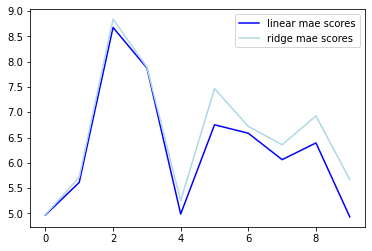

In [50]:
plt.plot(lin_mae_scores, color="blue", label = "linear mae scores")
plt.plot(ridge_mae_scores, color="lightblue", label = "ridge mae scores")
plt.legend()


<BarContainer object of 2 artists>

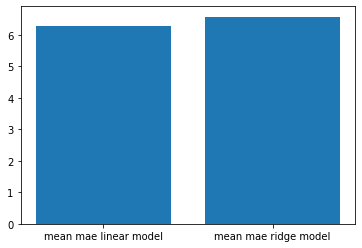

In [52]:
plt.bar(["mean mae linear model", "mean mae ridge model"], [np.mean(lin_mae_scores), np.mean(ridge_mae_scores)])

<BarContainer object of 2 artists>

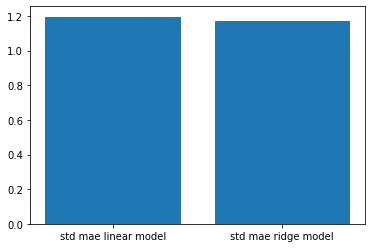

In [58]:
plt.bar(["std mae linear model", "std mae ridge model"], [np.std(lin_mae_scores), np.std(ridge_mae_scores)])

In [7]:
rf_models = {}
for n_est, i in zip(range(100, 1100, 100), range(0,10)):
    rf_models[n_est] = (RandomForestRegressor(n_est, random_state = 42))
    rf_models[n_est].fit(X_train, y_train)
    y_pred = rf_models[n_est].predict(X_test)

    print("n estimators: ", n_est, r2_score(y_test, y_pred), mean_absolute_error(y_test, y_pred), mean_squared_error(y_test, y_pred), np.sqrt(mean_squared_error(y_test, y_pred)))

n estimators:  100 0.7936941426168487 4.236691241155093 34.60981792762854 5.88301095763288
n estimators:  200 0.797084752961629 4.212529680627278 34.041010002420485 5.834467413776555
n estimators:  300 0.7979661407242964 4.1934868970833 33.89314861653211 5.82178225430427
n estimators:  400 0.8011007305430814 4.156314770554093 33.367290629356965 5.776442731418443
n estimators:  500 0.8009154513398938 4.162405285557819 33.39837302114863 5.779132549193575
n estimators:  600 0.8003019891674715 4.161405089912314 33.50128727846704 5.788029654249107
n estimators:  700 0.798980868201278 4.182408104278565 33.72291819423601 5.807143720818007
n estimators:  800 0.8000758634076016 4.163032103793932 33.53922207817225 5.7913057317130345
n estimators:  900 0.79923893692511 4.170089551133783 33.67962465105727 5.803414912881662
n estimators:  1000 0.7998820528285475 4.167838579382412 33.5717356913997 5.79411215730242


In [8]:
rf_models

{100: RandomForestRegressor(random_state=42),
 200: RandomForestRegressor(n_estimators=200, random_state=42),
 300: RandomForestRegressor(n_estimators=300, random_state=42),
 400: RandomForestRegressor(n_estimators=400, random_state=42),
 500: RandomForestRegressor(n_estimators=500, random_state=42),
 600: RandomForestRegressor(n_estimators=600, random_state=42),
 700: RandomForestRegressor(n_estimators=700, random_state=42),
 800: RandomForestRegressor(n_estimators=800, random_state=42),
 900: RandomForestRegressor(n_estimators=900, random_state=42),
 1000: RandomForestRegressor(n_estimators=1000, random_state=42)}

In [10]:
mae_scores = cross_val_score(rf_models[500], x, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
mae_scores = abs(mae_scores)
print(mae_scores)
print(np.mean(mae_scores), np.std(mae_scores))

[4.48259166 4.99307165 6.51264682 4.69660705 3.89880125 5.39406826
 4.96556073 4.38771817 5.12463192 4.38031593]
4.883601345195169 0.6823463679209946


In [11]:
r2_scores = cross_val_score(rf_models[500], x, y, scoring='r2', cv=cv, n_jobs=-1)
print(abs(r2_scores))
print(np.mean(r2_scores), np.std(r2_scores))

[0.77442081 0.68644765 0.46673561 0.81214674 0.79702916 0.67688729
 0.65639475 0.69085115 0.76052691 0.57882901]
0.6900269072087136 0.10099334371795134


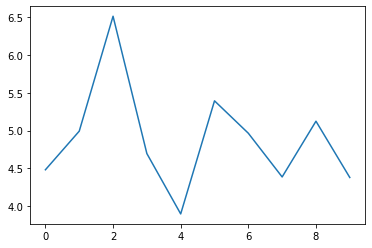

In [12]:
plt.plot(mae_scores)

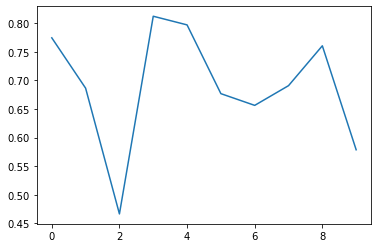

In [13]:
plt.plot(r2_scores)

In [ ]:
filename = '../trained_models/rf_model.sav'
joblib.dump(rf_models[500], filename)

['../trained_models/rf_model.sav']